# Trabalho Final - Explorando o WhatsApp
## Felipe- 

Video de Apresentação https://youtu.be/sCKPemHulS8

In [1]:
from tools import *

%config IPCompleter.greedy=True
from IPython.display import display, HTML, Markdown

plt.rcParams['figure.figsize'] = [15, 8]
plt.ion()

In [2]:
plt.rcParams['figure.figsize'] = [15, 8]
df = pd.read_csv("dataset/data_5.csv", sep=";")
addWeekday(df)

# Base de Dados

Com a popularização e evolução dos smartphones é cada vez mais comum usarmos aplicativos como What's App e Telegram para trocar mensagens com nossos colegas. Essas mensagens por sua vez são armazenadas no dispositivo e possuem informações valiosas para estudos de ciência de dados.

Neste trabalho adquirimos mensagens de conversas do What's App para formar um dataset de texto com anotação do autor de cada mensagem. Nele possuimos as colunas 'NOME', 'DATA', 'HORA', 'MINUTOS', 'MIDIA', 'MSG' e 'DIA', que significam, respectivamente, Autor, Data do envio, Hora do envio, Minuto do envio, Booleano indicando se possui mídia, texto da mensagem e o Dia da Semana que ela foi enviada. A coluna do dia da semana foi adocionado posteriormente.

In [3]:
user_count = df[["NOME", "MSG"]].groupby("NOME").count().sort_values(by="MSG")[::-1];
print("\nContagem de Mensagens:")
display(user_count)
display(df.iloc[10:15])


Contagem de Mensagens:


,MSG
NOME,
USER_00,10056
USER_01,8048


,NOME,DATA,HORA,MINUTO,MIDIA,MSG,DIA
10,USER_00,26/01/2018,12,54,0,Bom que vou arrumando as paradas aqui tbm,SEXTA
11,USER_00,26/01/2018,12,54,0,Quando acabar aí me fala,SEXTA
12,USER_00,26/01/2018,12,55,0,Isso *se der* fome,SEXTA
13,USER_01,26/01/2018,12,55,0,Oks,SEXTA
14,USER_01,26/01/2018,13,4,0,Acabei aqui,SEXTA


# O que gostaríamos de saber ?

## 1. Analise Exploratória

###  1.1 Distribuição da quantidade de mensagens enviadas nos dias de semana e nos finais de semana.
Aqui comparamos a quantidade de mensagens enviadas de segunda a sexta e de sábado a domingo, como mostram os histogramas <span style="color:green">verde</span>
 (de segunda a sexta) e <span style="color:red">vermelho</span>
 (final de semana).

É interessante notar que usamos muito mais o aplicativo de mensagens no meio da semana! Sendo que teóricamente estamos mais livres para fazer isso durante o final de semana. Podemos pensar que durate o final de semana geralmente ocupamos nosso tempo com tarefas que escolhemos realizar naquele momento, então o celular acaba sendo bem menos distrativo. Apesar de ser uma hipótese interessante, não conseguimos avaliá-la... Na próxima etapa seção projeto vamos ver como fazer isso.

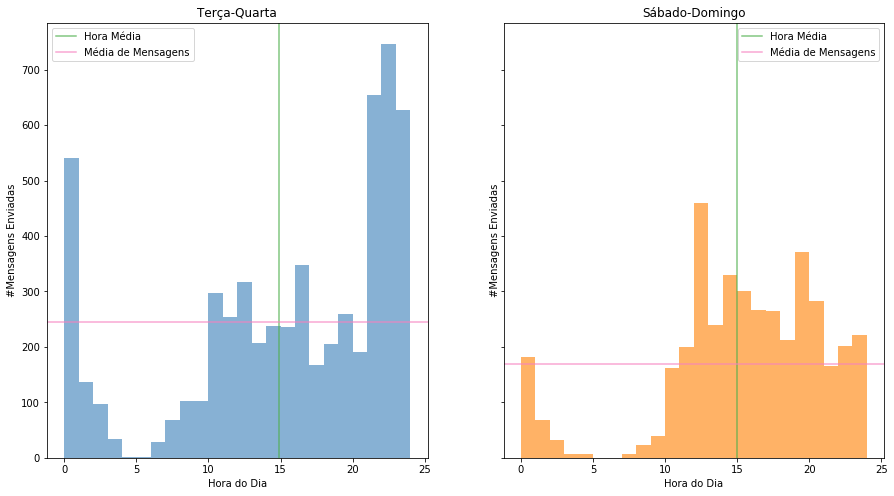

In [4]:
histWeek(df);

###  1.2 Distribuição do tempo de resposta

Nos histogramas abaixo mostramos o tempo de resposta de cada usuário. Fazemos isso calculando o tempo entre a ultima mensagem do `Usuario X` e a primeira do `Usuario Y`. Ainda existe um pequeno problema nessa abordagem, as mensagens que não respondidas acabam gerando uma diferença de tempo muito grande, por isso não consideramos os casos onde o tempo de resposta passa de 200 minutos

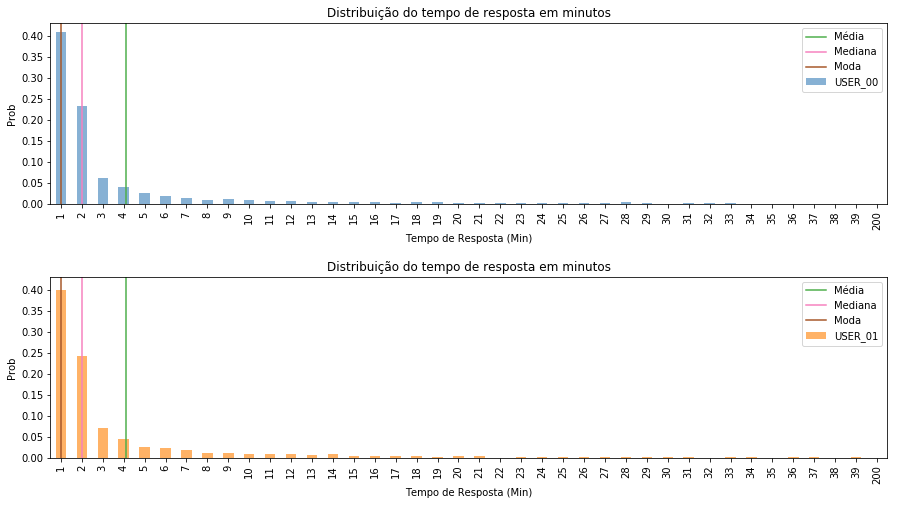

In [5]:
resp = tempoResposta(df)
plotHistTempoResposta(resp);

#### 1.2.1 Teste de Hipótese
Essa distribuição de tempo de resposta faz parte de um dataset de uma conversa privada. Muitas pessoas dizem que essa situação não se repete nos grupos de conversa, e isso é algo que podemos testar. Então temos nossa hipótese `O comportamento do tempo de resposta em conversas privadas é diferente nos grupos de conversa`. Naturalmente a hipótese nula seria que o comportamento se repete.

Para isso primeiro vamos abrir um dataset de um grupo de conversa.


In [6]:
group_df = pd.read_csv("dataset/data_3.csv", sep=";")
group_user_count = group_df[["NOME", "MSG"]].groupby("NOME").count().sort_values(by="MSG")[::-1];
mais_ativos = group_user_count.iloc[:2].index.values
# group_df = group_df[np.array(list(map(bool, group_df["NOME"] == mais_ativos[0]))) | np.array(list(map(bool, group_df["NOME"] == mais_ativos[1])))]
print("\nContagem de Mensagens:")
display(group_user_count)
display(group_df.head())


Contagem de Mensagens:


,MSG
NOME,
USER_02,4149
USER_00,2597
USER_04,2526
USER_01,2443
USER_05,2087
USER_06,570
USER_03,375
USER_07,272


,NOME,DATA,HORA,MINUTO,MIDIA,MSG
0,USER_00,25/01/2018,23,12,0,Quem anima PUBG???
1,USER_01,25/01/2018,23,14,0,jaja eu durmo fhdsjkafhdjas
2,USER_00,25/01/2018,23,24,0,Pouxa
3,USER_00,27/01/2018,18,35,0,E aquele PUBG agora einnnnn
4,USER_02,27/01/2018,18,43,0,n to em bhaaaaa


Para manter um padrão, vamos analisar apenas os dois usuários mais ativos no grupo

In [7]:
group_resp = tempoResposta(group_df)

new_group_resp = {}
for key in group_resp:
    if key in mais_ativos:
        new_group_resp[key] = group_resp[key]

del group_resp
group_resp = new_group_resp

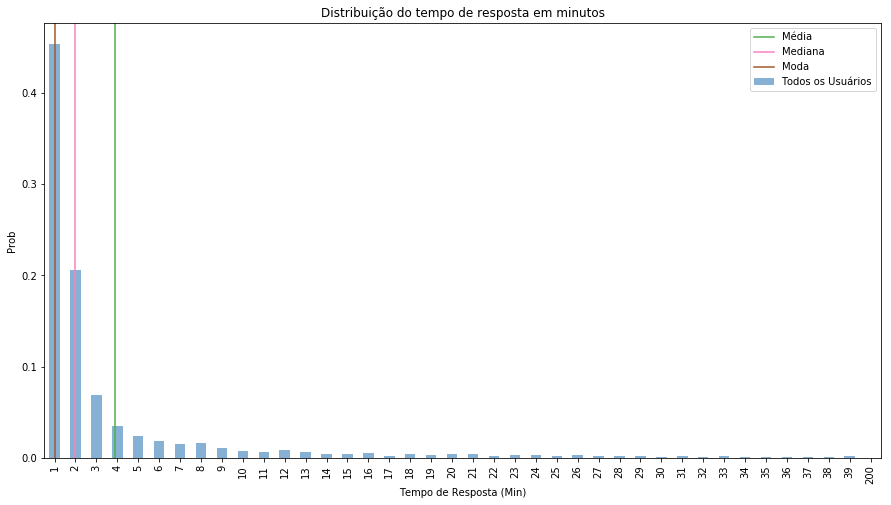

In [8]:
plotHistTempoResposta(group_resp, join=True);

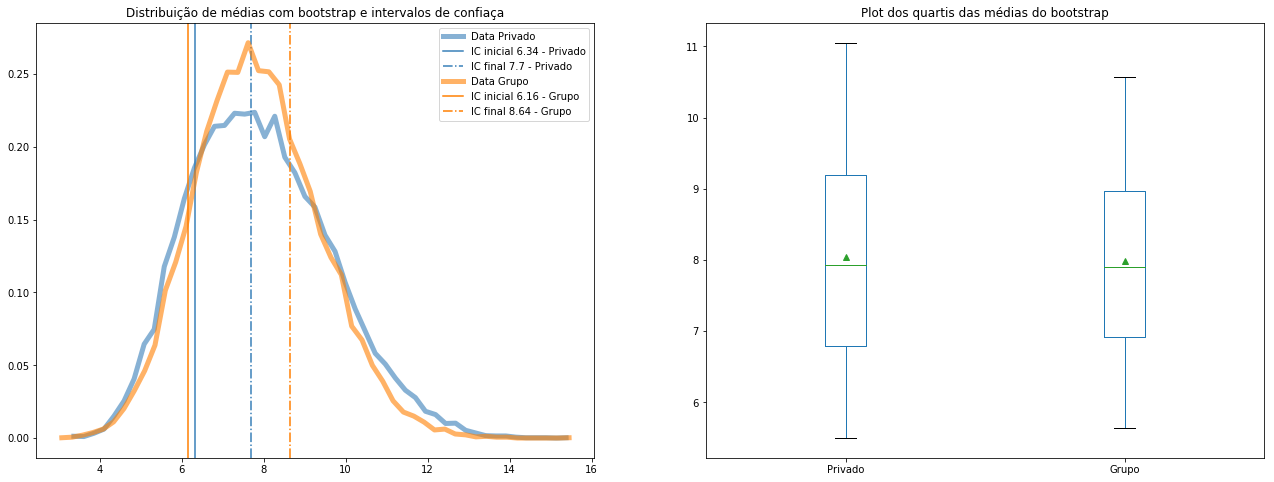

In [9]:
plotBootstrapMeans([resp, group_resp], label=["Privado", "Grupo"])

Para comparar o comportamento dos gráficos, vamos usar bootstrap para calcular a distribuição de média a partir de escolhas de conjunto de pontos aleatórios. Vemos que apesar de terem curvas muito semelhantes, o intervalo de confiança é consideravelmente diferente. Podemos concluir que apesar do conportamento entre conversas não seja perfeitamente mantido, ele é próximo.

###  1.3 Distribuição do tamanho das mensagens

Bom, visto isso, conseguimos realizar essas mesmas comparações entre os tamanhos das mensagens enviadas em um grupo e no privado, novamente olhando apenas para os integrantes mais ativos.

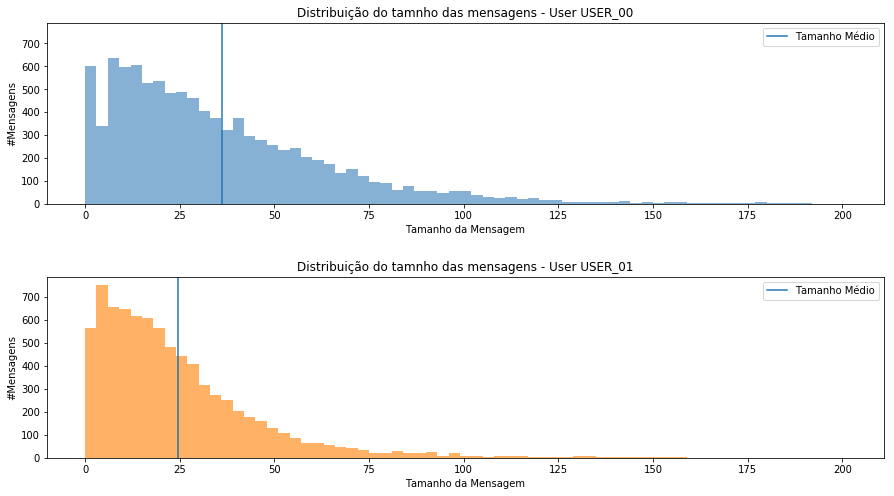

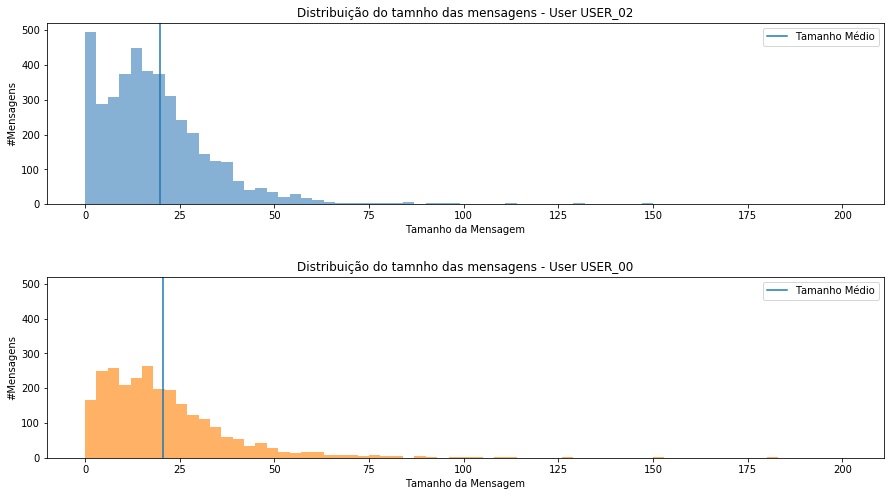

In [10]:
len_privado = plotTamanhoMensagem(df)
len_grupo = plotTamanhoMensagem(group_df, keys=mais_ativos)

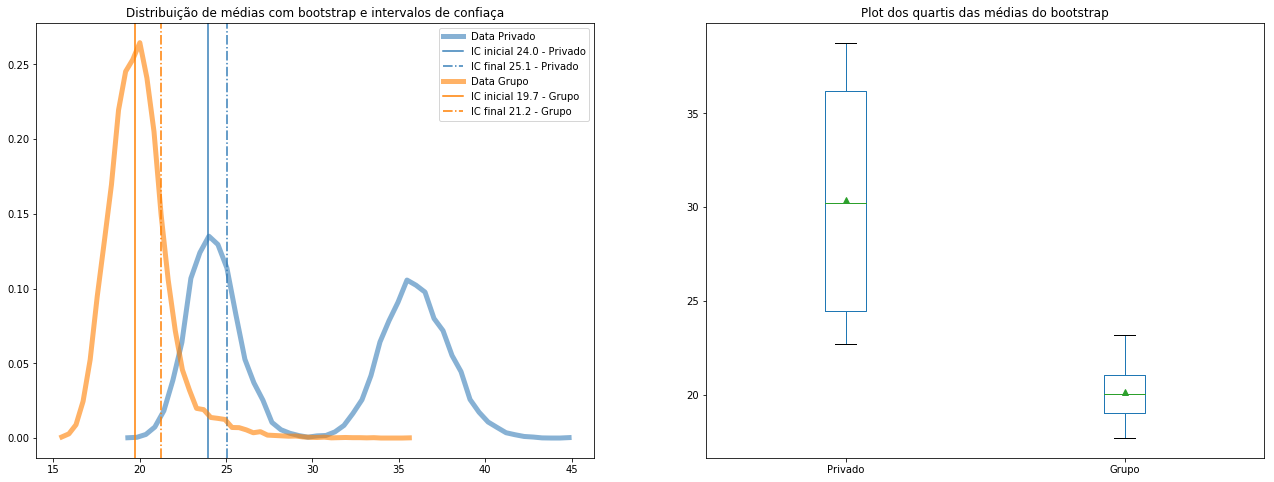

In [11]:
plotBootstrapMeans([len_privado, len_grupo], label=["Privado", "Grupo"])

Diferente do primeiro exemplo, podemos notar um ligeira diferença entre as distribuições

## 2. Regressão
  ### 2.1 Tamanho da Mensagem x Número de Mensagens em Sequência
  
  Existem dois tipos de pessoas no What's App:

  Tipo 1:

  ![](images/tipo1.png)

  Tipo 2:
  
  ![](images/tipo2.png)

  Considerando essa pequena brincadeira vamos testar a seguinte hipótese: `Quem manda mensagens mais curtas manda mais mensagens`.
  
  Se pensarmos mais um pouco nisso podemos dizer que a razão entre a quantidade de mensagens e a soma dos caracteres dessas mesagens deveria se manter. No caso da hipótese nula, essa razão não deveria se manter.
  
  Abaixo temos os histogramas dessas razões, nele podemos notar que o intervalo de confiança é bem pequeno.

In [12]:
sum_data = genDatasetSequencia(df, np.sum)

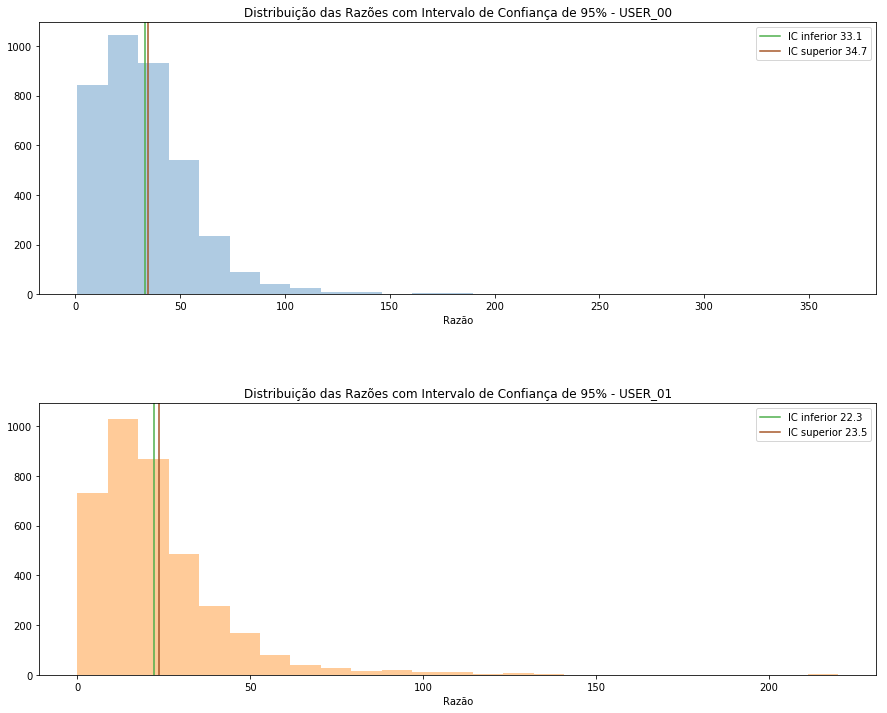

In [13]:
plotHistRazaoSequencia(sum_data);

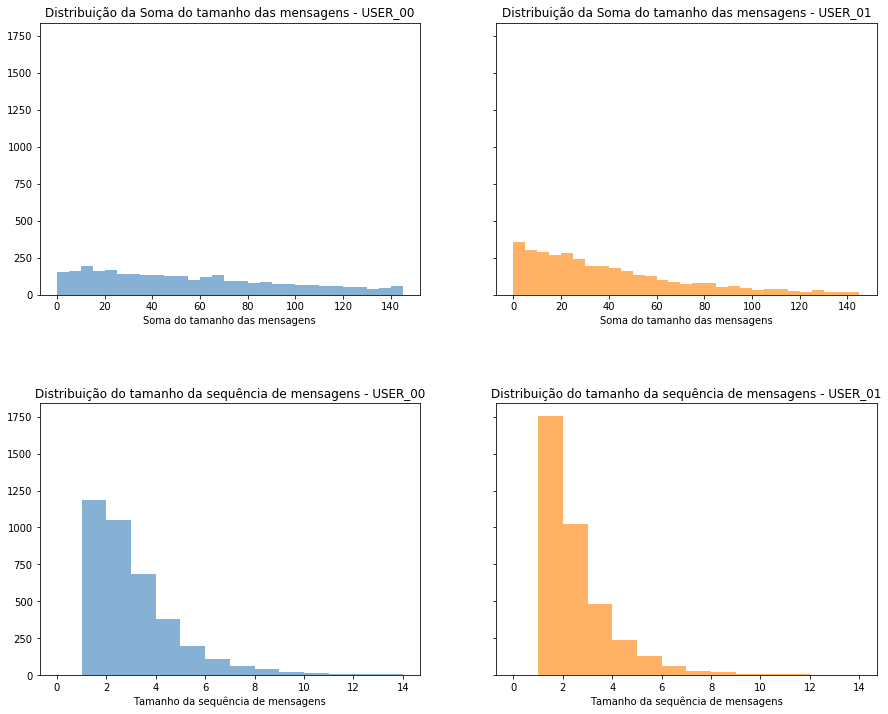

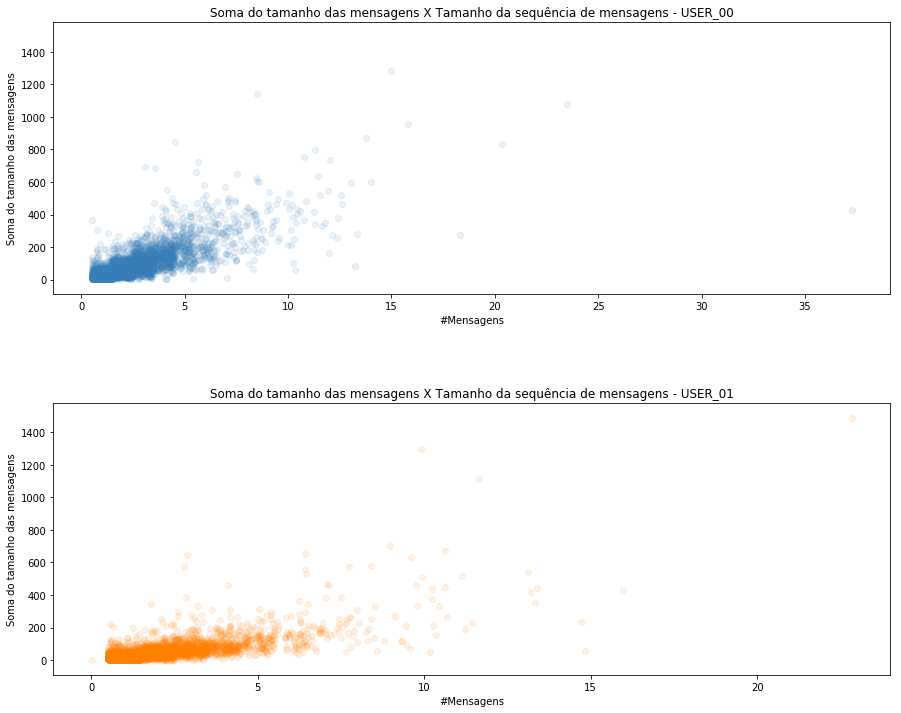

In [14]:
plotHistSequencia(sum_data, 'Soma');
plotSequencia(sum_data, "Soma");

-------------------------
coefficient of determination: 0.5652707518102764
intercept: -6.437006279762329
slope: [38.75393026]
-------------------------
coefficient of determination: 0.495220733690655
intercept: -12.82755917214785
slope: [30.65665379]
-------------------------


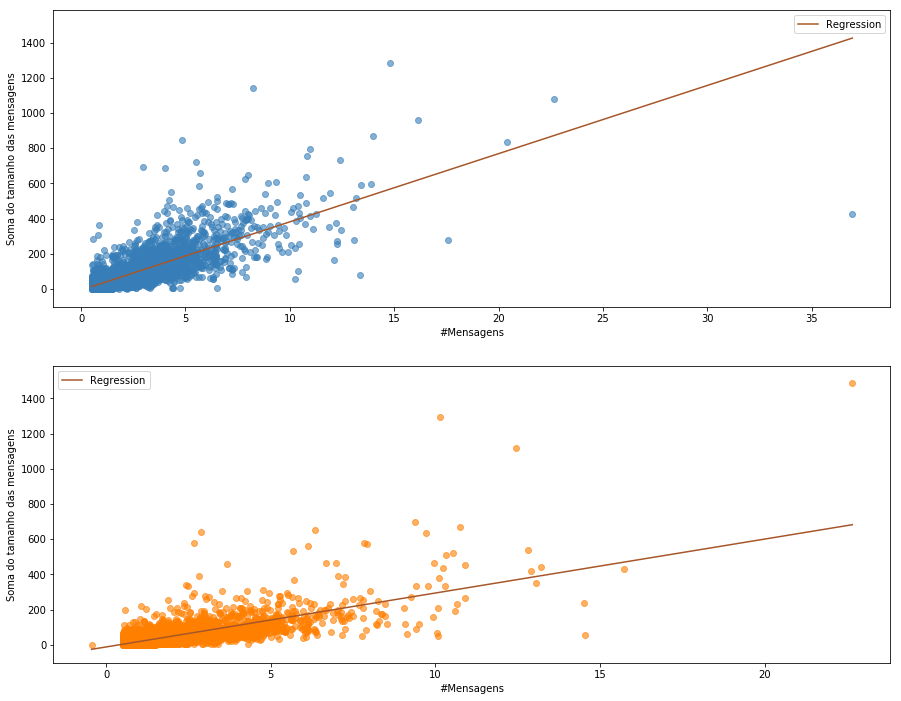

In [15]:
Regressao(sum_data)

## 3. Classificação

###   3.1 Identificando quem escreveu uma mensagem!


  Atualmente existem diferentes métodos de identificação, usando sensores biométricos, reconhecimento facial e etc...

  Para cada método podemos gerar uma relação entre a eficácia e o nivel de intrusão. Um exame de DNA tem o maior nível de intrusão, mas pode chegar a uma margem de acerto de 99,9%, porém em muitos casos podemos abrir mão da enorme eficácia para reduzir o nível de intrusão, como sensores biométricos que possuem boa eficácia e um nível de intrusão médio. 

  Onde queremos chegar com isso ? Estamos em uma era digital, praticamente todos se comunicam por mensagens o tempo inteiro! Imagine como seria interessante saber se o estilo de escrita de cada pessoa é suficiente para identifica-la em um conjunto de indivíduos. Bom... Aqui não vamos usar exatamente o estilo de escrita, mas sim o vocabulário de casa pessoa. Usando Bag of Words e NaiveBayes vamos tentar classificar mensagens.

Treino:  0.8096388869709314
Teste:  0.6962165147749241
              precision    recall  f1-score   support

           0       0.68      0.85      0.75      1989
           1       0.73      0.51      0.60      1632

   micro avg       0.70      0.70      0.70      3621
   macro avg       0.71      0.68      0.68      3621
weighted avg       0.70      0.70      0.69      3621

Normalized confusion matrix
[[0.84766214 0.15233786]
 [0.48835784 0.51164216]]


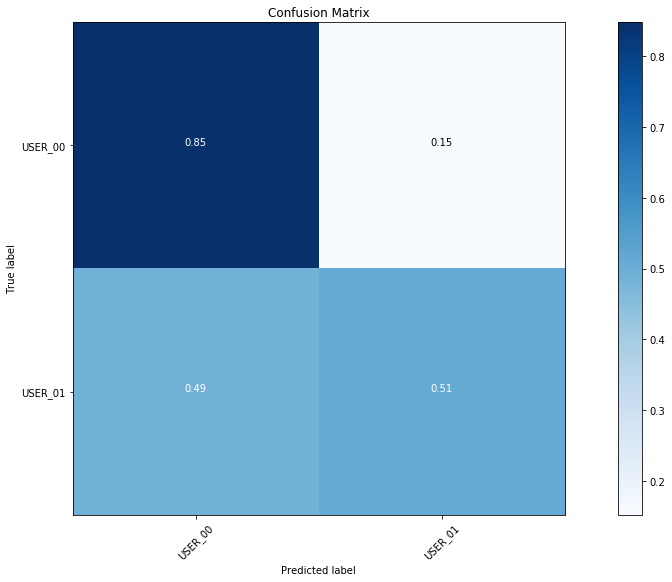

In [16]:
dataset = GenDataset(df)
model = TrainTest(dataset, df)

Bom... O que aconteceu aqui ?

A matrix de confusão motra que conseguimos classificar bem o `USER_00`, mas o classificador ficou completamente em dúvida sobre o usuário `USER_01`. Como estamos analisando apenas o vocabulário do usuário, o que aconteceu foi que boa parte do vocabulário do `USER_01` está contido no vocabulário do `USER_00`. Então quando o `USER_00` escreve uma mensagem é facil dizer que a mensagem é dele, mas quando o `USER_01` escreve uma mensagem ela tem também o mesmo vocabulário que o `USER_00` usa, deixando o classificador em dúvida.

In [17]:
v = Vocabulario(df)

In [18]:
vocab00 = v['USER_00']
vocab01 = v['USER_01']

print("Tamanho do Vocabulario de USER_00", len(vocab00))
print("Tamanho do Vocabulario de USER_01", len(vocab01))
print("Tamanho da intercessão:", len(vocab00.intersection(vocab01)))

Tamanho do Vocabulario de USER_00 7261
Tamanho do Vocabulario de USER_01 4923
Tamanho da intercessão: 2685
